# Aprendizado Multilabel para recomendação de comidas
Dataset food trucck



# Importações de pacotes

In [ ]:
# Data Preprocessing Packages
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import re
from scipy.io.arff import loadarff

# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando Dataset

In [ ]:
#raw_data = loadarff('foodtruck.arff')
raw_data = loadarff('/content/drive/MyDrive/Colab Notebooks/datasets/foodtruck/foodtruck.arff')
df = pd.DataFrame(raw_data[0])
#convert_dtypes()
#df.drop(columns = ['Unnamed: 0'],inplace = True)
df.head(30)

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,b'dinner',30.0,b'friend',5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,b'M',2.0,1.5,4.0,0.0,b'single',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
1,0.0,b'dinner',20.0,b'by_chance',5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,b'F',3.0,2.0,5.0,1.0,b'married',b'1',b'0',b'1',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
2,1.0,b'afternoon',15.0,b'by_chance',5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,b'M',2.0,1.5,4.0,1.0,b'single',b'1',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
3,0.0,b'lunch',40.0,b'friend',5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,b'M',3.0,2.0,6.0,1.0,b'single',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.0,b'dinner',15.0,b'social_network',5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,b'M',2.0,1.5,4.0,1.0,b'single',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
5,1.0,b'dinner',20.0,b'friend',5.0,4.0,3.0,3.0,4.0,5.0,4.0,2.0,3.0,3.0,3.0,b'M',2.0,1.5,1.0,0.0,b'single',b'1',b'0',b'0',b'0',b'1',b'0',b'0',b'1',b'0',b'0',b'0',b'1'
6,1.0,b'dinner',20.0,b'friend',4.0,5.0,5.0,4.0,4.0,4.0,5.0,3.0,3.0,2.0,1.0,b'M',3.0,2.0,1.0,1.0,b'single',b'1',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
7,0.0,b'dinner',15.0,b'by_chance',5.0,4.0,3.0,5.0,5.0,4.0,5.0,2.0,4.0,3.0,1.0,b'F',3.0,2.0,2.0,0.0,b'single',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1'
8,1.0,b'dinner',20.0,b'social_network',5.0,5.0,3.0,5.0,4.0,3.0,5.0,3.0,2.0,3.0,3.0,b'F',2.0,1.5,6.0,0.0,b'single',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'1'
9,0.0,b'dinner',40.0,b'friend',5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,1.0,b'M',2.0,1.5,3.0,1.0,b'single',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'0',b'0'


In [ ]:
df.dtypes

frequency          float64
time                object
expenses           float64
motivation          object
taste              float64
hygiene            float64
menu               float64
presentation       float64
attendance         float64
ingredients        float64
place.to.sit       float64
takeaway           float64
variation          float64
stop.strucks       float64
schedule           float64
gender              object
age.group          float64
scholarity         float64
average.income     float64
has.work           float64
marital.status      object
street_food         object
gourmet             object
italian_food        object
brazilian_food      object
mexican_food        object
chinese_food        object
japanese_food       object
arabic_food         object
snacks              object
healthy_food        object
fitness_food        object
sweets_desserts     object
dtype: object

In [ ]:
#adjusting str for numeric colls
df["street_food"] = pd.to_numeric(df["street_food"])
df["gourmet"] = pd.to_numeric(df["gourmet"])
df["italian_food"] = pd.to_numeric(df["italian_food"])
df["brazilian_food"] = pd.to_numeric(df["brazilian_food"])
df["mexican_food"] = pd.to_numeric(df["mexican_food"])
df["chinese_food"] = pd.to_numeric(df["chinese_food"])
df["japanese_food"] = pd.to_numeric(df["japanese_food"])
df["arabic_food"] = pd.to_numeric(df["arabic_food"])
df["snacks"] = pd.to_numeric(df["snacks"])
df["healthy_food"] = pd.to_numeric(df["healthy_food"])
df["fitness_food"] = pd.to_numeric(df["fitness_food"])
df["sweets_desserts"] = pd.to_numeric(df["sweets_desserts"])
#adjusting cols object types
df["time"] =df.iloc[:,1].str.decode('utf8')
df["motivation"] =df.iloc[:,3].str.decode('utf8')
df["gender"] =df.iloc[:,15].str.decode('utf8')
df["marital.status"] =df.iloc[:,20].str.decode('utf8')

df

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,dinner,30.0,friend,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,M,2.0,1.5,4.0,0.0,single,1,0,0,0,0,0,0,0,0,0,0,1
1,0.0,dinner,20.0,by_chance,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,F,3.0,2.0,5.0,1.0,married,1,0,1,0,1,0,0,0,0,0,0,1
2,1.0,afternoon,15.0,by_chance,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,1,0,0,0,0,0,0,0,0
3,0.0,lunch,40.0,friend,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,M,3.0,2.0,6.0,1.0,single,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,dinner,15.0,social_network,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,dinner,30.0,friend,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,F,3.0,2.0,3.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
403,0.0,dinner,30.0,social_network,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,F,1.0,1.0,4.0,0.0,single,1,1,0,0,0,0,0,0,0,0,0,1
404,0.0,dinner,30.0,social_network,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,M,2.0,2.0,1.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,1
405,1.0,dinner,30.0,social_network,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,M,3.0,1.5,2.0,1.0,married,1,1,1,1,1,1,1,1,1,0,0,1


In [ ]:
df

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,dinner,30.0,friend,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,M,2.0,1.5,4.0,0.0,single,1,0,0,0,0,0,0,0,0,0,0,1
1,0.0,dinner,20.0,by_chance,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,F,3.0,2.0,5.0,1.0,married,1,0,1,0,1,0,0,0,0,0,0,1
2,1.0,afternoon,15.0,by_chance,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,1,0,0,0,0,0,0,0,0
3,0.0,lunch,40.0,friend,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,M,3.0,2.0,6.0,1.0,single,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,dinner,15.0,social_network,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,dinner,30.0,friend,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,F,3.0,2.0,3.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
403,0.0,dinner,30.0,social_network,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,F,1.0,1.0,4.0,0.0,single,1,1,0,0,0,0,0,0,0,0,0,1
404,0.0,dinner,30.0,social_network,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,M,2.0,2.0,1.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,1
405,1.0,dinner,30.0,social_network,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,M,3.0,1.5,2.0,1.0,married,1,1,1,1,1,1,1,1,1,0,0,1


In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
#profile = ProfileReport(df, title='tt', html={'style':{'full_width':True}})

In [ ]:
profile

default


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/basic.py:300: UserWarning: %profile is now deprecated. Please use get_ipython().profile instead.
  warn("%profile is now deprecated. Please use get_ipython().profile instead.")


In [ ]:
df.describe()

,frequency,expenses,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,age.group,scholarity,average.income,has.work,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.00000,407.000000
mean,0.761671,21.486486,4.771499,4.651106,3.773956,4.272727,4.535627,4.481572,3.786241,2.732187,3.420147,2.690418,2.663391,2.358722,1.640049,2.958231,0.511057,0.724816,0.294840,0.105651,0.176904,0.100737,0.039312,0.088452,0.061425,0.164619,0.081081,0.07371,0.378378
std,0.987461,7.247503,0.595032,0.699150,1.097696,0.877647,0.724711,0.799649,1.164333,0.982367,1.070374,1.283653,1.356325,1.412145,0.907029,1.569640,0.500493,0.447157,0.456532,0.307769,0.382057,0.301351,0.194575,0.284301,0.240404,0.371293,0.273296,0.26162,0.485580
min,0.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,15.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,20.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.500000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,4.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Características do dataset

# Pré-processamento

In [ ]:
labels = ['street_food', 'gourmet', 'italian_food', 'brazilian_food', 'mexican_food', 'chinese_food', 'japanese_food', 'arabic_food', 'snacks', 'healthy_food', 'fitness_food', 'sweets_desserts']

feats_df = df.drop(columns = labels)
labels_df = df[labels]

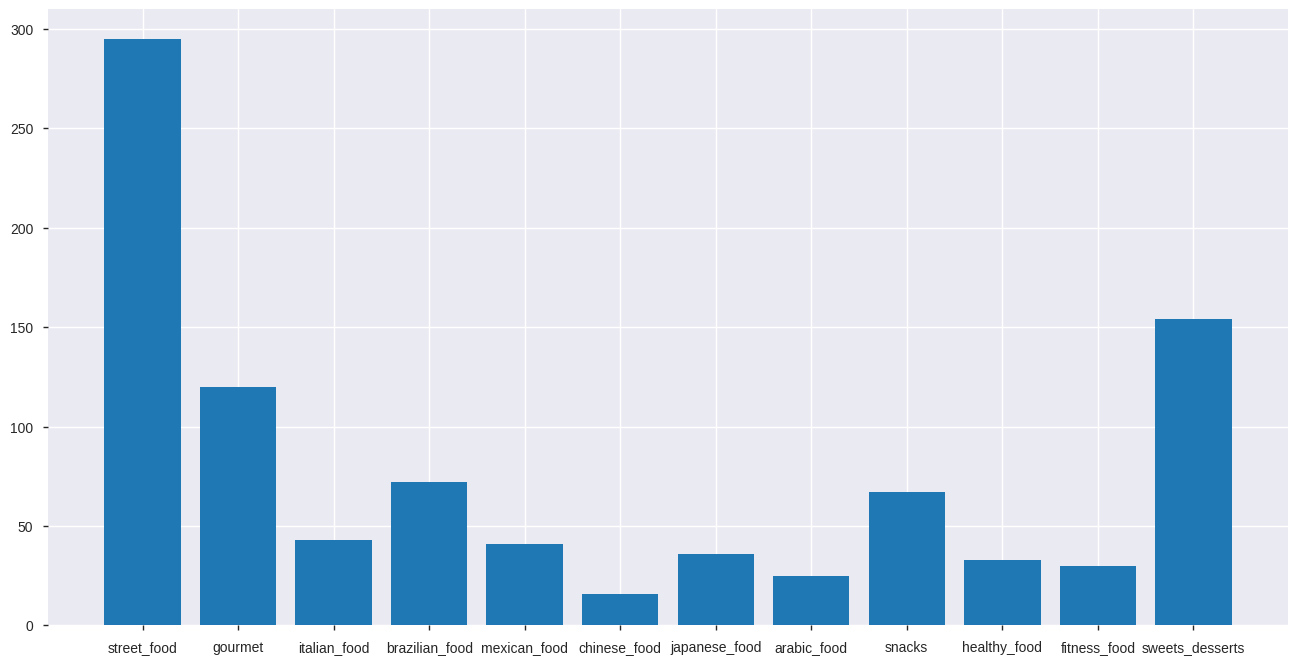

In [ ]:
label_d = {'street_food' : 0, 'gourmet': 0, 'italian_food' : 0, 'brazilian_food' : 0, 'mexican_food': 0, 'chinese_food' : 0, 'japanese_food': 0, 'arabic_food':0, 'snacks': 0, 'healthy_food':0, 'fitness_food':0, 'sweets_desserts':0}
for col in labels_df.columns:
    label_d[col] += len(labels_df[labels_df[col] == 1])
    
plt.figure(figsize = (16,8))
plt.bar(range(len(label_d)), list(label_d.values()), align='center')
plt.xticks(range(len(label_d)), list(label_d.keys()))
plt.show()

In [ ]:
df.dtypes

frequency          float64
time                object
expenses           float64
motivation          object
taste              float64
hygiene            float64
menu               float64
presentation       float64
attendance         float64
ingredients        float64
place.to.sit       float64
takeaway           float64
variation          float64
stop.strucks       float64
schedule           float64
gender              object
age.group          float64
scholarity         float64
average.income     float64
has.work           float64
marital.status      object
street_food          int64
gourmet              int64
italian_food         int64
brazilian_food       int64
mexican_food         int64
chinese_food         int64
japanese_food        int64
arabic_food          int64
snacks               int64
healthy_food         int64
fitness_food         int64
sweets_desserts      int64
dtype: object

In [ ]:
df

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,dinner,30.0,friend,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,M,2.0,1.5,4.0,0.0,single,1,0,0,0,0,0,0,0,0,0,0,1
1,0.0,dinner,20.0,by_chance,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,F,3.0,2.0,5.0,1.0,married,1,0,1,0,1,0,0,0,0,0,0,1
2,1.0,afternoon,15.0,by_chance,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,1,0,0,0,0,0,0,0,0
3,0.0,lunch,40.0,friend,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,M,3.0,2.0,6.0,1.0,single,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,dinner,15.0,social_network,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,M,2.0,1.5,4.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,dinner,30.0,friend,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,F,3.0,2.0,3.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,0
403,0.0,dinner,30.0,social_network,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,F,1.0,1.0,4.0,0.0,single,1,1,0,0,0,0,0,0,0,0,0,1
404,0.0,dinner,30.0,social_network,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,M,2.0,2.0,1.0,1.0,single,1,0,0,0,0,0,0,0,0,0,0,1
405,1.0,dinner,30.0,social_network,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,M,3.0,1.5,2.0,1.0,married,1,1,1,1,1,1,1,1,1,0,0,1


##label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
leTime = LabelEncoder()
leMotivation = LabelEncoder()
leGender = LabelEncoder()
leMaritalstatus = LabelEncoder()
df["time"]= leTime.fit_transform(df["time"].values)
df["motivation"]= leMotivation.fit_transform(df["motivation"].values)
df["gender"]= leGender.fit_transform(df["gender"].values)
df["marital.status"]= leMaritalstatus.fit_transform(df["marital.status"].values)
df

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,2.0,2,30.0,2,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,1,2.0,1.5,4.0,0.0,2,1,0,0,0,0,0,0,0,0,0,0,1
1,0.0,2,20.0,1,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,0,3.0,2.0,5.0,1.0,1,1,0,1,0,1,0,0,0,0,0,0,1
2,1.0,0,15.0,1,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,1,2.0,1.5,4.0,1.0,2,1,0,0,1,0,0,0,0,0,0,0,0
3,0.0,4,40.0,2,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,1,3.0,2.0,6.0,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,2,15.0,3,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1,2.0,1.5,4.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,2,30.0,2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,0,3.0,2.0,3.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,0
403,0.0,2,30.0,3,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,0,1.0,1.0,4.0,0.0,2,1,1,0,0,0,0,0,0,0,0,0,1
404,0.0,2,30.0,3,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,1,2.0,2.0,1.0,1.0,2,1,0,0,0,0,0,0,0,0,0,0,1
405,1.0,2,30.0,3,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,1,3.0,1.5,2.0,1.0,1,1,1,1,1,1,1,1,1,1,0,0,1


In [ ]:
df.dtypes

frequency          float64
time                 int64
expenses           float64
motivation           int64
taste              float64
hygiene            float64
menu               float64
presentation       float64
attendance         float64
ingredients        float64
place.to.sit       float64
takeaway           float64
variation          float64
stop.strucks       float64
schedule           float64
gender               int64
age.group          float64
scholarity         float64
average.income     float64
has.work           float64
marital.status       int64
street_food          int64
gourmet              int64
italian_food         int64
brazilian_food       int64
mexican_food         int64
chinese_food         int64
japanese_food        int64
arabic_food          int64
snacks               int64
healthy_food         int64
fitness_food         int64
sweets_desserts      int64
dtype: object

##OneHotEncoder

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#ohe = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,15,20])], remainder='passthrough')
#df  = ohe.fit_transform(df)
#df

In [ ]:
df.shape

(407, 33)

#Split dataset

In [ ]:
dataset = pd.DataFrame(df)
X  = dataset.iloc[:,0:-12].values
y = dataset.iloc[:,21:].values
X
df_X = dataset.iloc[:,0:-12]
df_y = dataset.iloc[:,21:]

In [ ]:
df_X

,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,place.to.sit,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status
0,2.0,2,30.0,2,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,1,2.0,1.5,4.0,0.0,2
1,0.0,2,20.0,1,5.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,3.0,1.0,4.0,0,3.0,2.0,5.0,1.0,1
2,1.0,0,15.0,1,5.0,2.0,2.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,1,2.0,1.5,4.0,1.0,2
3,0.0,4,40.0,2,5.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,1,3.0,2.0,6.0,1.0,2
4,0.0,2,15.0,3,5.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1,2.0,1.5,4.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,2,30.0,2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,0,3.0,2.0,3.0,1.0,2
403,0.0,2,30.0,3,5.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,0,1.0,1.0,4.0,0.0,2
404,0.0,2,30.0,3,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,2.0,1,2.0,2.0,1.0,1.0,2
405,1.0,2,30.0,3,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,1,3.0,1.5,2.0,1.0,1


In [ ]:
X.shape, y.shape

((407, 21), (407, 12))

In [ ]:
#!pip install scikit-multilearn

Removendo desalamceamento - Oversampling

In [ ]:
#feats_df
#labels_df
#labels_df.columns

In [ ]:
def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = labels_df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

In [ ]:
a = get_tail_label(df_y)
a

['mexican_food',
 'chinese_food',
 'japanese_food',
 'arabic_food',
 'healthy_food',
 'fitness_food']

In [ ]:
def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

In [ ]:
b = get_index(df_y)
print(b)

[1, 5, 6, 261, 8, 9, 266, 11, 268, 269, 272, 16, 20, 277, 25, 27, 284, 285, 31, 38, 40, 297, 41, 44, 302, 303, 48, 50, 51, 53, 312, 57, 316, 320, 65, 69, 325, 71, 326, 76, 77, 82, 83, 86, 87, 347, 93, 94, 351, 352, 97, 98, 100, 102, 104, 107, 108, 110, 367, 112, 116, 117, 373, 121, 122, 377, 124, 125, 127, 128, 129, 130, 384, 131, 135, 136, 394, 395, 140, 143, 144, 148, 405, 155, 160, 163, 174, 179, 180, 184, 188, 189, 190, 198, 199, 200, 201, 203, 207, 209, 210, 211, 213, 214, 215, 221, 222, 224, 233, 242, 243, 251]


In [ ]:
def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y) #y
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

In [ ]:
xsub, ysub = get_minority_instace(df_X,df_y)
ysub


,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,1,0,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,0,0,0,0,0,0,0,0,0,1,0
108,1,0,0,0,0,0,0,1,0,0,0,1
109,1,1,1,1,0,0,0,1,1,0,0,1
110,1,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

In [ ]:
def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

In [ ]:

X_sub, y_sub = get_minority_instace(df_X, df_y)   #Getting minority instance of that datframe


In [ ]:
from sklearn.neighbors import NearestNeighbors
import random
X_res,y_res =MLSMOTE(X_sub, y_sub, 500)     #Applying MLSMOTE to augment the dataframe

In [ ]:
y_res.dtypes

street_food        float64
gourmet            float64
italian_food       float64
brazilian_food     float64
mexican_food       float64
chinese_food       float64
japanese_food      float64
arabic_food        float64
snacks             float64
healthy_food       float64
fitness_food       float64
sweets_desserts    float64
dtype: object

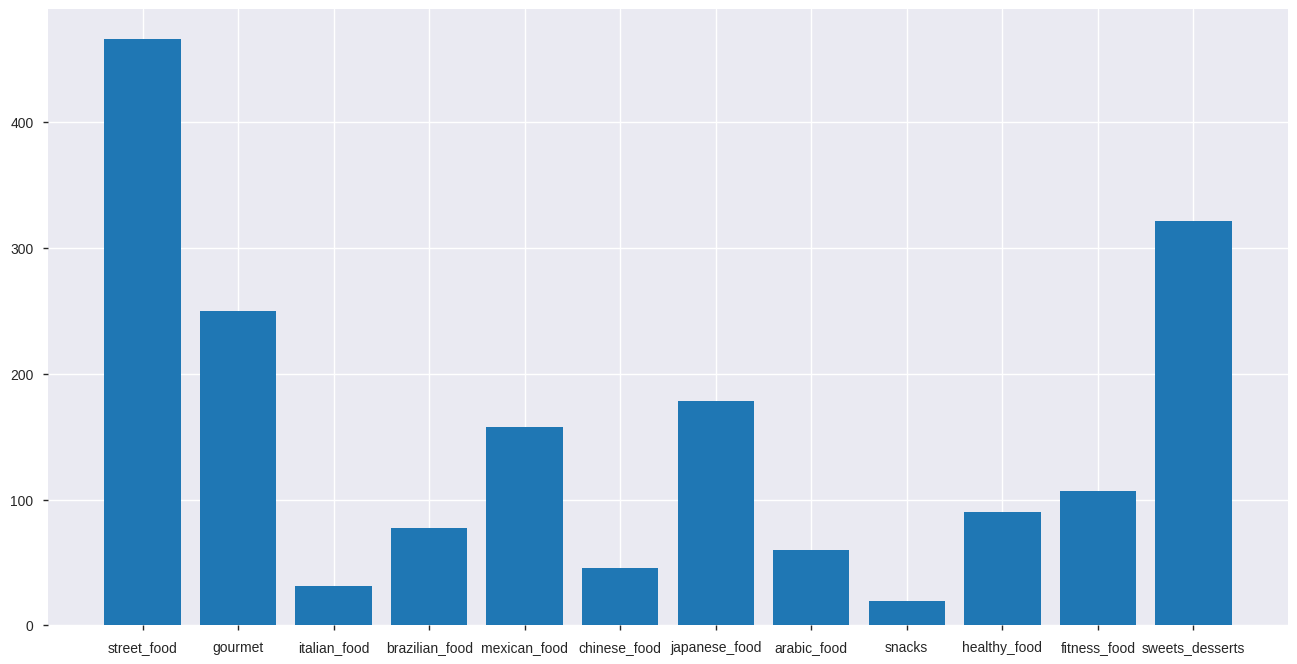

In [ ]:
label_dsub = {'street_food' : 0, 'gourmet': 0, 'italian_food' : 0, 'brazilian_food' : 0, 'mexican_food': 0, 'chinese_food' : 0, 'japanese_food': 0, 'arabic_food':0, 'snacks': 0, 'healthy_food':0, 'fitness_food':0, 'sweets_desserts':0}
for col in y_res.columns:
    label_dsub[col] += len(y_res[y_res[col] == 1])
    
plt.figure(figsize = (16,8))
plt.bar(range(len(label_dsub)), list(label_dsub.values()), align='center')
plt.xticks(range(len(label_dsub)), list(label_dsub.keys()))
plt.show()

Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_over = scaler.fit_transform(X_over)

#utilzando os dados com oversampling
##X = scaler.fit_transform(X_res) 

In [ ]:
#utlizando os dados sem oversampling
X = scaler.fit_transform(X)

In [ ]:
#y utilizando oversampling
#y = y_res
#y= y.values
#y

In [ ]:
X[0]

array([ 1.25559743,  0.18196657,  1.17612812, -0.23762347,  0.38448796,
       -0.93242832,  0.20617958, -1.45194336, -0.73999989, -0.60297132,
        0.18381531,  0.27295588, -0.39300688, -0.5385158 , -0.48971097,
        1.03755993, -0.25433919, -0.15459421,  0.6645164 , -1.02236301,
        0.41120099])

In [ ]:
#X_over

In [ ]:
#
#X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.40)

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split

In [ ]:
!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [ ]:
mskf = MultilabelStratifiedKFold(n_splits=10, shuffle=True, random_state=0)

for train_index, test_index in mskf.split(X, y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  20  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  51  52  53  54  55  56
  57  58  59  61  63  64  65  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  97
  98  99 100 101 102 103 105 106 107 108 109 110 111 112 113 114 115 117
 118 119 120 121 122 123 124 125 126 127 128 129 132 133 135 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 164 165 166 167 168 169 170 171 172 175 176 177 178
 179 180 181 182 183 184 185 186 188 189 190 191 192 194 195 196 197 198
 199 200 201 202 203 205 206 208 209 210 211 212 213 214 216 217 218 219
 220 221 222 223 224 225 227 228 229 230 231 232 233 234 235 236 238 239
 240 241 242 243 245 246 248 249 250 251 252 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271

In [ ]:
X_train.shape, y_train.shape

((368, 21), (368, 12))

In [ ]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

,"(0,)","(11,)","(2,)","(4,)","(3,)","(1,)","(7,)","(9,)","(6,)","(10,)","(5,)","(8,)"
train,265,138,39,37,65,108,23,30,32,27,14,61
test,30,16,4,4,7,12,2,3,4,3,2,6


#ML Classification

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

In [ ]:
br_classifier = BinaryRelevance(classifier=SVC(),require_dense=[False, True])
br_classifier.fit(X_train, y_train)

BinaryRelevance(classifier=SVC(), require_dense=[False, True])

In [ ]:
prediction = br_classifier.predict(X_test)
predicoes_br = pd.DataFrame(prediction.toarray())
predicoes_br

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1,

In [ ]:
import sklearn.metrics as metrics
hl = metrics.hamming_loss(y_test, predicoes_br)
acc = metrics.accuracy_score(y_test, predicoes_br)
F1 = metrics.f1_score(y_test, predicoes_br, average='micro')
print(acc, hl, F1)

0.28205128205128205 0.14316239316239315 0.5179856115107914


In [ ]:
print(metrics.classification_report(y_test,predicoes_br))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        30
           1       0.75      0.25      0.38        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.67      0.25      0.36        16

   micro avg       0.78      0.39      0.52        93
   macro avg       0.19      0.12      0.14        93
weighted avg       0.48      0.39      0.40        93
 samples avg       0.77      0.51      0.55        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP 

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=1000, verbose=True, tol=0.000001).fit(X_train, y_train)
mlp_pred = mlp.predict_proba(X_test)

Iteration 1, loss = 8.08133367
Iteration 2, loss = 7.83629372
Iteration 3, loss = 7.61124797
Iteration 4, loss = 7.39484743
Iteration 5, loss = 7.19000062
Iteration 6, loss = 6.99808665
Iteration 7, loss = 6.81063764
Iteration 8, loss = 6.63809594
Iteration 9, loss = 6.47320042
Iteration 10, loss = 6.31729696
Iteration 11, loss = 6.17131204
Iteration 12, loss = 6.03404551
Iteration 13, loss = 5.90679916
Iteration 14, loss = 5.78600373
Iteration 15, loss = 5.67292617
Iteration 16, loss = 5.56781878
Iteration 17, loss = 5.46897403
Iteration 18, loss = 5.37749383
Iteration 19, loss = 5.28950757
Iteration 20, loss = 5.20935791
Iteration 21, loss = 5.13617491
Iteration 22, loss = 5.06687258
Iteration 23, loss = 5.00164385
Iteration 24, loss = 4.94173951
Iteration 25, loss = 4.88457495
Iteration 26, loss = 4.83304176
Iteration 27, loss = 4.78498741
Iteration 28, loss = 4.73881497
Iteration 29, loss = 4.69738825
Iteration 30, loss = 4.65802560
Iteration 31, loss = 4.62203710
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Matriz de confusão

In [ ]:
labels

['street_food',
 'gourmet',
 'italian_food',
 'brazilian_food',
 'mexican_food',
 'chinese_food',
 'japanese_food',
 'arabic_food',
 'snacks',
 'healthy_food',
 'fitness_food',
 'sweets_desserts']

multilabel_confusion_matrix
verdadeiro negativo, falsos positivos
falsos negativos, verdadeiros positivos

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, prediction)
cm

array([[[ 3,  6],
        [ 1, 29]],

       [[26,  1],
        [ 9,  3]],

       [[35,  0],
        [ 4,  0]],

       [[31,  1],
        [ 7,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[33,  0],
        [ 6,  0]],

       [[36,  0],
        [ 3,  0]],

       [[36,  0],
        [ 3,  0]],

       [[21,  2],
        [12,  4]]])

In [ ]:
print("micro: {:.2f}".format(metrics.precision_score(y_test, predicoes_br, average='micro')))
print("macro: {:.2f} ".format( metrics.precision_score(y_test, predicoes_br, average='macro')))
print("weighted: {:.2f} ".format( metrics.precision_score(y_test, predicoes_br, average='weighted')))
print("samples: {:.2f} ".format( metrics.precision_score(y_test, predicoes_br, average='samples')))  



micro: 0.78
macro: 0.19 
weighted: 0.48 
samples: 0.77 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Testes com divervos ML Clissificadores

In [ ]:
avaliacoes = {}

In [ ]:
#Binary Relevance => Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
classifier.fit(X_train, y_train)
prediction_br_RFC=classifier.predict(X_test)

ACC_BR_RFC = metrics.accuracy_score(y_test, prediction_br_RFC)
HL_BR_RFC = metrics.hamming_loss(y_test, prediction_br_RFC)
FS_BR_RFC = metrics.f1_score(y_test, prediction_br_RFC, average='micro')
print(ACC_BR_RFC, HL_BR_RFC, FS_BR_RFC)
avaliacoes["ACC_BR_RFC"] = ACC_BR_RFC
avaliacoes["HL_BR_RFC"] = HL_BR_RFC
avaliacoes["FS_BR_RFC"] = FS_BR_RFC


0.3076923076923077 0.1452991452991453 0.5211267605633803


In [ ]:
print(metrics.classification_report(y_test,prediction_br_RFC))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.57      0.33      0.42        12
           2       0.00      0.00      0.00         4
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.50      0.17      0.25         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.60      0.19      0.29        16

   micro avg       0.76      0.40      0.52        93
   macro avg       0.25      0.15      0.17        93
weighted avg       0.52      0.40      0.42        93
 samples avg       0.76      0.54      0.57        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmm = multilabel_confusion_matrix(y_test, prediction_br_RFC)
cmm

array([[[ 4,  5],
        [ 2, 28]],

       [[24,  3],
        [ 8,  4]],

       [[35,  0],
        [ 4,  0]],

       [[31,  1],
        [ 6,  1]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[32,  1],
        [ 5,  1]],

       [[36,  0],
        [ 3,  0]],

       [[36,  0],
        [ 3,  0]],

       [[21,  2],
        [13,  3]]])

Label Power Set => RandomForest

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(classifier = RandomForestClassifier(), require_dense = [False, True])
classifier.fit(X_train, y_train)
prediction_LP_RFC=classifier.predict(X_test)

ACC_LP_RFC = metrics.accuracy_score(y_test, prediction_LP_RFC)
HL_LP_RFC = metrics.hamming_loss(y_test, prediction_LP_RFC)
FS_LP_RFC = metrics.f1_score(y_test, prediction_LP_RFC, average='micro')
print(ACC_LP_RFC, HL_LP_RFC, FS_LP_RFC)
avaliacoes["ACC_LP_RFC"] = ACC_LP_RFC
avaliacoes["HL_LP_RFC"] = HL_LP_RFC
avaliacoes["FS_LP_RFC"] = FS_LP_RFC

0.358974358974359 0.14743589743589744 0.48888888888888893


In [ ]:
print(metrics.classification_report(y_test,prediction_LP_RFC))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       0.50      0.08      0.14        12
           2       0.00      0.00      0.00         4
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.50      0.06      0.11        16

   micro avg       0.79      0.35      0.49        93
   macro avg       0.24      0.11      0.12        93
weighted avg       0.49      0.35      0.35        93
 samples avg       0.82      0.51      0.57        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmlp = multilabel_confusion_matrix(y_test, prediction_LP_RFC)
cmlp

array([[[ 3,  6],
        [ 0, 30]],

       [[26,  1],
        [11,  1]],

       [[35,  0],
        [ 4,  0]],

       [[32,  0],
        [ 6,  1]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[32,  1],
        [ 6,  0]],

       [[36,  0],
        [ 3,  0]],

       [[36,  0],
        [ 3,  0]],

       [[22,  1],
        [15,  1]]])


Label Power Set => SVM




In [ ]:
classifier = LabelPowerset(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, y_train)
prediction_LP_SVM=classifier.predict(X_test)

ACC_LP_SVM = metrics.accuracy_score(y_test, prediction_LP_SVM)
HL_LP_SVM = metrics.hamming_loss(y_test, prediction_LP_SVM)
FS_LP_SVM = metrics.f1_score(y_test, prediction_LP_SVM, average='micro')
print(ACC_LP_SVM, HL_LP_SVM, FS_LP_SVM)
avaliacoes["ACC_LP_SVM"] = ACC_LP_SVM
avaliacoes["HL_LP_SVM"] = HL_LP_SVM
avaliacoes["FS_LP_SVM"] = FS_LP_SVM

0.358974358974359 0.14957264957264957 0.4696969696969696


In [ ]:
print(metrics.classification_report(y_test,prediction_LP_SVM))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.08      0.15        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        16

   micro avg       0.79      0.33      0.47        93
   macro avg       0.15      0.09      0.09        93
weighted avg       0.38      0.33      0.30        93
 samples avg       0.79      0.48      0.55        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmlpsvm = multilabel_confusion_matrix(y_test, prediction_LP_SVM)
cmlpsvm

array([[[ 1,  8],
        [ 0, 30]],

       [[27,  0],
        [11,  1]],

       [[35,  0],
        [ 4,  0]],

       [[32,  0],
        [ 7,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[33,  0],
        [ 6,  0]],

       [[36,  0],
        [ 3,  0]],

       [[36,  0],
        [ 3,  0]],

       [[23,  0],
        [16,  0]]])

Classifier Chain => RandonForest

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(classifier = RandomForestClassifier(),require_dense = [False, True])
classifier.fit(X_train,y_train)
predict_CC_RFC = classifier.predict(X_test)

ACC_CC_RFC = metrics.accuracy_score(y_test, predict_CC_RFC)
HL_CC_RFC = metrics.hamming_loss(y_test, predict_CC_RFC) 
FS_CC_RFC = metrics.f1_score(y_test, predict_CC_RFC, average='micro')
print(ACC_CC_RFC, HL_CC_RFC, FS_CC_RFC)
avaliacoes["ACC_CC_RFC"] = ACC_CC_RFC
avaliacoes["HL_CC_RFC"] = HL_CC_RFC
avaliacoes["FS_CC_RFC"] = FS_CC_RFC

0.3333333333333333 0.1452991452991453 0.5


In [ ]:
print(metrics.classification_report(y_test,predict_CC_RFC))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        30
           1       1.00      0.25      0.40        12
           2       0.00      0.00      0.00         4
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.50      0.06      0.11        16

   micro avg       0.79      0.37      0.50        93
   macro avg       0.24      0.12      0.14        93
weighted avg       0.52      0.37      0.38        93
 samples avg       0.80      0.50      0.56        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmccrf = multilabel_confusion_matrix(y_test, predict_CC_RFC)
cmccrf

array([[[ 3,  6],
        [ 1, 29]],

       [[27,  0],
        [ 9,  3]],

       [[35,  0],
        [ 4,  0]],

       [[31,  1],
        [ 6,  1]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[32,  1],
        [ 6,  0]],

       [[36,  0],
        [ 3,  0]],

       [[36,  0],
        [ 3,  0]],

       [[22,  1],
        [15,  1]]])

In [ ]:
#classifierChain =>SVM

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(classifier = SVC(),require_dense = [False, True])
classifier.fit(X_train,y_train)
predict_CC_SVM = classifier.predict(X_test)

ACC_CC_SVM = metrics.accuracy_score(y_test, predict_CC_SVM)
HL_CC_SVM = metrics.hamming_loss(y_test, predict_CC_SVM) 
FS_CC_SVM = metrics.f1_score(y_test, predict_CC_SVM, average='micro')
print(ACC_CC_SVM, HL_CC_SVM, FS_CC_SVM)
avaliacoes["ACC_CC_SVM"] = ACC_CC_SVM
avaliacoes["HL_CC_SVM"] = HL_CC_SVM
avaliacoes["FS_CC_SVM"] = FS_CC_SVM

0.3076923076923077 0.1452991452991453 0.5


In [ ]:
print(metrics.classification_report(y_test,predict_CC_SVM))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        30
           1       0.75      0.25      0.38        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.67      0.12      0.21        16

   micro avg       0.79      0.37      0.50        93
   macro avg       0.19      0.11      0.12        93
weighted avg       0.48      0.37      0.37        93
 samples avg       0.78      0.50      0.55        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmccsvm = multilabel_confusion_matrix(y_test, predict_CC_SVM)
cmccsvm

array([[[ 3,  6],
        [ 1, 29]],

       [[26,  1],
        [ 9,  3]],

       [[35,  0],
        [ 4,  0]],

       [[31,  1],
        [ 7,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[35,  0],
        [ 4,  0]],

       [[37,  0],
        [ 2,  0]],

       [[33,  0],
        [ 6,  0]],

       [[36,  0],
        [ 3,  0]],

       [[36,  0],
        [ 3,  0]],

       [[22,  1],
        [14,  2]]])

BrKNN Classifier

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'k': range(3,5)}
score = 'f1_micro'
classifier = GridSearchCV(BRkNNaClassifier(), parameters, scoring=score)
classifier.fit(X_train, y_train)

print('best parameters :', classifier.best_params_,'best score: ',classifier.best_score_)

prediction_BRkNNaClassifier = classifier.predict(X_test)

ACC_BRKNN = metrics.accuracy_score(y_test, prediction_BRkNNaClassifier)
HL_BRKNN = metrics.hamming_loss(y_test, prediction_BRkNNaClassifier) 
FS_BRKNN = metrics.f1_score(y_test, prediction_BRkNNaClassifier, average='micro')
print(ACC_BRKNN, HL_BRKNN, FS_BRKNN)
avaliacoes["ACC_BRKNN"] = ACC_BRKNN
avaliacoes["HL_BRKNN"] = HL_BRKNN
avaliacoes["FS_BRKNN"] = FS_BRKNN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/skmultilearn/adapt/brknn.py", line 39, in fit
    self.knn_ = NearestNeighbors(self.k).fit(X)
TypeError: __init__() takes 1 positional argument but 2 were given

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mo

TypeError: ignored

MLKNN Classifier

In [ ]:
from skmultilearn.adapt import MLkNN
classifier_mlknn = MLkNN(k=5, s=0.5)
prediction_mlknn = classifier_mlknn.fit(X_train, y_train).predict(X_test)
ACC_MLKNN = metrics.accuracy_score(y_test, prediction_mlknn)
HL_MLKNN = metrics.hamming_loss(y_test, prediction_mlknn) 
FS_MLKNN = metrics.f1_score(y_test, prediction_mlknn, average='micro')
print(ACC_MLKNN, HL_MLKNN, FS_MLKNN)
avaliacoes["ACC_MLKNN"] = ACC_MLKNN
avaliacoes["HL_MLKNN"] = HL_MLKNN
avaliacoes["FS_MLKNN"] = FS_MLKNN

pd.DataFrame(prediction_mlknn.toarray())

Resultados: F1, ACC, HL

In [ ]:
print(avaliacoes)

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(classifier = RandomForestClassifier(),require_dense = [False, True],order=[i for i in range(6)])
classifier.fit(X_train,y_train)
predict_CC_RFC = classifier.predict(X_test)

#ACC_CC_RFC = metrics.accuracy_score(y_test, predict_CC_RFC)
#HL_CC_RFC = metrics.hamming_loss(y_test, predict_CC_RFC) 
#FS_CC_RFC = metrics.f1_score(y_test, predict_CC_RFC, average='micro')

#avaliacoes["ACC_CC_RFC"] = ACC_CC_RFC
#avaliacoes["HL_CC_RFC"] = HL_CC_RFC
#avaliacoes["FS_CC_RFC"] = FS_CC_RFC


In [ ]:
pd.DataFrame(predict_CC_RFC.toarray())